### Speed Dating Experiment

##### By Grace Cho & Eddy Widerker 

### Project Design Write-Up

##### Background + Dataset Introduction

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper [Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment](http://faculty.chicagobooth.edu/emir.kamenica/documents/genderDifferences.pdf) and details are as follows:

* Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. 

* The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. 

##### Project Problem + Hypothesis

In this project, we will aim to explore which of the six attributes (Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests) are most important to getting a positive response from their speed dating partners. 

* A hypothesis is that those who score high on the 'Attractiveness' attribute would be more likely to be chosen for future dates.

Some of the other data exploration ideas are as follows:

* What are the least/most desirable attributes in a male partner? Does this differ for female partners?
* Are shared interests more important than a shared racial background?

##### Project Concerns

Following are some questions I have about the project / dataset:

* How can I choose from the variables available?
* How do each of the variables relate to one another?
* How can I better understand the data dictionary available / what type of data is each variable (categorical v. numerical)?
* Which model is most applicable to this question?

Some of the risks to the project are as follows:

* If the model is wrong, those who read the findings may have inaccurate knowledge of attributes that influence getting a positive response from dates.
* Data is gathered from sample of population and is not representative of general population.

#####  Outcomes

The output would be a combination of exploratory data analysis followed by building of model to explain which of the 6 attributes is most important to getting a positive rate from the speed dating partners. There would be easy - to - follow visuals as well as descriptions of each step of analysis for the audience.

The model does not have to be complicated, if the goal remains that I want to simply identify which of the 6 attributes are important for success in speed dating. The project will be considered a success if I can achive this aim, and if it fails I would continue the analysis from a different angle or apply a different model for analysis.

# Exploratory Data Analysis

In [243]:
# imports

from scipy.stats import norm
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [244]:
# Read in Data
speed_dating_data = pd.read_csv('Speed Dating Data.csv')

# Sets df to view all 195 columns of the data set
pd.set_option('display.max_columns', 200)

sddf = speed_dating_data.copy()
sddf.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [245]:
sddf.shape

(8378, 195)

#### Data mapping for categorial variables

In [246]:
# convert number values for gender, race, race_o (aka race of partner) to text values
#sddf['gender'] = sddf.gender.apply(lambda x: "female" if x==0 else "male")

#race_map = {1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic American", \
#            4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"}

#sddf['race'] = sddf.race.map(race_map)
#sddf['race_o'] = sddf.race.map(race_map)

In [247]:
sddf.shar1_1.describe()

count    8257.000000
mean       11.845111
std         6.362154
min         0.000000
25%         9.520000
50%        10.640000
75%        16.000000
max        30.000000
Name: shar1_1, dtype: float64

#### Removing NaNs

In [248]:
# remove NaNs from age

#sddf = sddf[sddf.age.notnull()].copy()
#len(sddf) - len(sddf['match'].dropna())

In [249]:
# mean imputation for missing attribute values

list_meanimpu = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'shar1_1', \
               'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'shar2_1']


for x in list_meanimpu:
    sddf[x] = sddf[x].fillna(method = 'ffill')
    


In [251]:
list_dropna = list_meanimpu + ['gender', 'race', 'age', 'samerace', 'imprace', 'imprelig', 'match', 'int_corr']

df_nonull = sddf[list_dropna].dropna()

print df_nonull.isnull().sum()

attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
shar1_1     0
attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
shar2_1     0
gender      0
race        0
age         0
samerace    0
imprace     0
imprelig    0
match       0
int_corr    0
dtype: int64


## Time 1 Analysis - participant reponses prior to speed dating event

In [252]:
# Demographics - gender, race, age, samerace, imprace, imprelig

demo = ['gender', 'race', 'age', 'samerace', 'imprace', 'imprelig', 'match']
df_demo = sddf[demo]
print df_demo.head()

   gender  race   age  samerace  imprace  imprelig  match
0       0   4.0  21.0         0      2.0       4.0      0
1       0   4.0  21.0         0      2.0       4.0      0
2       0   4.0  21.0         1      2.0       4.0      1
3       0   4.0  21.0         0      2.0       4.0      1
4       0   4.0  21.0         0      2.0       4.0      1


### EDA of df_demo

In [253]:
# match vs. race
pd.crosstab(index=df_demo['match'], columns = df_demo['samerace'], margins = True, normalize = 'all')

samerace,0,1,All
match,,,
0,0.507042,0.328241,0.835283
1,0.097159,0.067558,0.164717
All,0.604201,0.395799,1.000000


In [254]:
# match vs. imprace - scale from 1 to 10
pd.crosstab(index=df_demo['match'], columns = df_demo['imprace'], margins = True)

imprace,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
match,,,,,,,,,,,,
0,7,2280,795,812,424,557,443,469,597,331,219,6934
1,1,518,159,171,86,100,81,74,66,78,31,1365
All,8,2798,954,983,510,657,524,543,663,409,250,8299


In [255]:
# match vs. imprace - scale from 1 to 10
pd.crosstab(index=df_demo['match'], columns = df_demo['imprelig'], margins = True)

imprelig,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
match,,,,,,,,,,,
0,2495,735,771,426,603,553,398,417,252,284,6934
1,537,128,158,98,94,108,69,100,30,43,1365
All,3032,863,929,524,697,661,467,517,282,327,8299


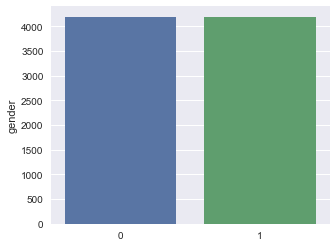

In [256]:
# gender
sns.set(rc={"figure.figsize": (5,4)})
sns.barplot(x=df_demo.gender.value_counts().index, \
           y = df_demo.gender.value_counts(), data = df_demo, ci = None)

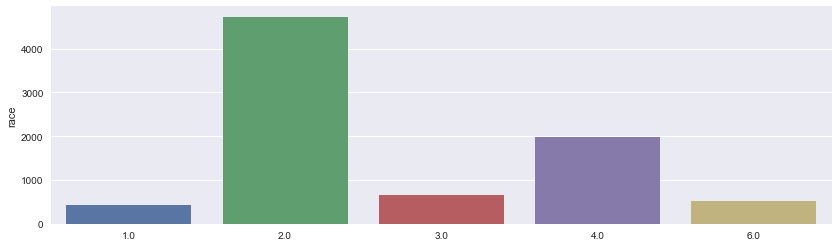

In [257]:
# race
sns.set(rc={"figure.figsize": (14,4)})
sns.barplot(x=df_demo.race.value_counts().index, \
           y = df_demo.race.value_counts(), data = df_demo, ci = None)


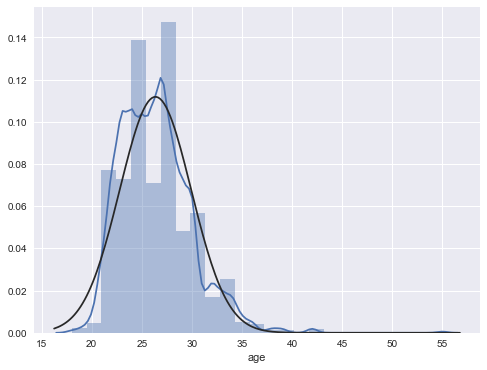

In [258]:
# age
sns.set(rc={"figure.figsize": (8,6)})

# distribution plot of age after dropping NaN
sns.distplot(df_demo.age.dropna(), hist = True, fit=norm, bins=25)

### EDA of df_attributes

In [259]:
#  Attributes - attr1_1: what you look for,  attr 2_1: what you think the oppositie sex looks for

attributes = ['wave', 'int_corr', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', \
             'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']

df_attributes = sddf[attributes].sample(n=100).sort_values('wave')
print df_attributes.head()

     wave  int_corr  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  \
196     1     -0.16    100.0      0.0       0.0     0.0     0.0      0.0   
165     1      0.47     35.0     15.0      25.0    10.0     5.0     10.0   
345     2     -0.44     10.0     20.0      20.0    20.0    20.0     10.0   
509     2     -0.38     25.0     20.0      25.0    20.0    10.0      0.0   
769     2      0.72     40.0     15.0      20.0    10.0     5.0     10.0   

     attr2_1  sinc2_1  intel2_1  fun2_1  amb2_1  shar2_1  
196     50.0     10.0      10.0    10.0    10.0     10.0  
165     25.0     20.0      20.0    20.0    10.0      5.0  
345     35.0      5.0      15.0    20.0    10.0     15.0  
509     40.0      0.0      30.0    20.0    10.0      0.0  
769     30.0     15.0      20.0    15.0    10.0     10.0  


In [260]:
df_attributes.describe()

,wave,int_corr,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
count,100.000000,98.000000,100.000000,100.000000,100.00000,100.000000,99.000000,100.000000,100.000000,100.00000,100.000000,100.000000,99.00000,100.000000
mean,11.520000,0.214286,22.100800,17.276600,20.75970,16.307600,11.490909,12.659600,32.560600,12.41040,13.818100,18.895200,10.79303,11.430200
std,6.062769,0.303818,13.468088,7.249878,6.46454,5.922522,6.895742,5.960048,17.056445,6.78157,6.239519,6.082819,5.36967,5.938417
min,1.000000,-0.520000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.000000,0.00000,0.000000,1.000000,0.00000,0.000000
25%,7.000000,-0.040000,15.000000,15.000000,18.32250,12.000000,10.000000,10.000000,20.000000,10.00000,10.000000,15.000000,10.00000,10.000000
50%,12.000000,0.280000,20.000000,18.000000,20.00000,16.305000,10.000000,10.000000,30.000000,10.00000,14.145000,20.000000,10.00000,10.000000
75%,15.000000,0.450000,25.000000,20.000000,25.00000,20.000000,15.000000,17.482500,40.000000,15.41750,20.000000,20.000000,15.00000,15.000000
max,21.000000,0.740000,100.000000,47.000000,50.00000,35.000000,53.000000,30.000000,95.000000,30.00000,30.000000,40.000000,25.00000,25.000000


### Exploring Correlations

* factor plots between match & x variables
* t-tests

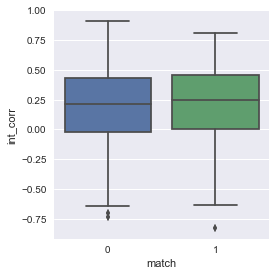

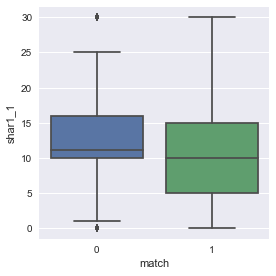

In [261]:
# interest correlations

# factor plot of interest correlation
sns.factorplot(
    x = 'match',
    y = 'int_corr',
    data = sddf,
    kind = 'box')

# factor plot of shar1_1 - shared interests
sns.factorplot(
    x = 'match',
    y = 'shar1_1',
    data = sddf,
    kind = 'box')

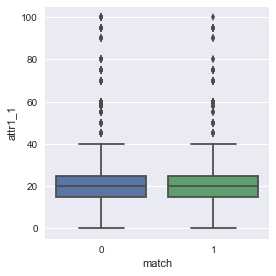

In [262]:
# factor plot of attr - attractiveness
sns.factorplot(
    x = 'match',
    y = 'attr1_1',
    data = sddf,
    kind = 'box')

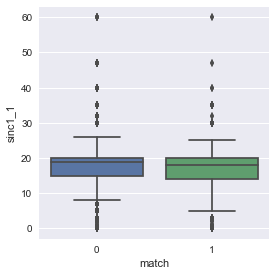

In [263]:
# factor plot of sinc - sincerity
sns.factorplot(
    x = 'match',
    y = 'sinc1_1',
    data = sddf,
    kind = 'box')

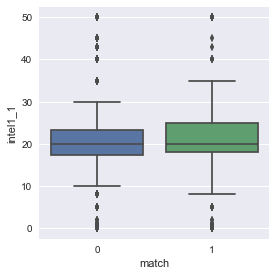

In [264]:
# factor plot of intel - intelligent
sns.factorplot(
    x = 'match',
    y = 'intel1_1',
    data = sddf,
    kind = 'box')

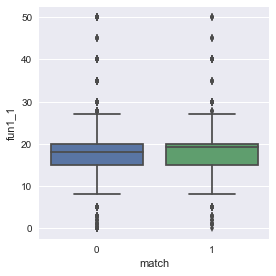

In [265]:
# factor plot of fun
sns.factorplot(
    x = 'match',
    y = 'fun1_1',
    data = sddf,
    kind = 'box')

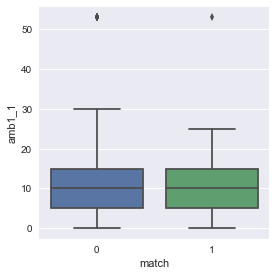

In [266]:
# factor plot of ambition
sns.factorplot(
    x = 'match',
    y = 'amb1_1',
    data = sddf,
    kind = 'box')

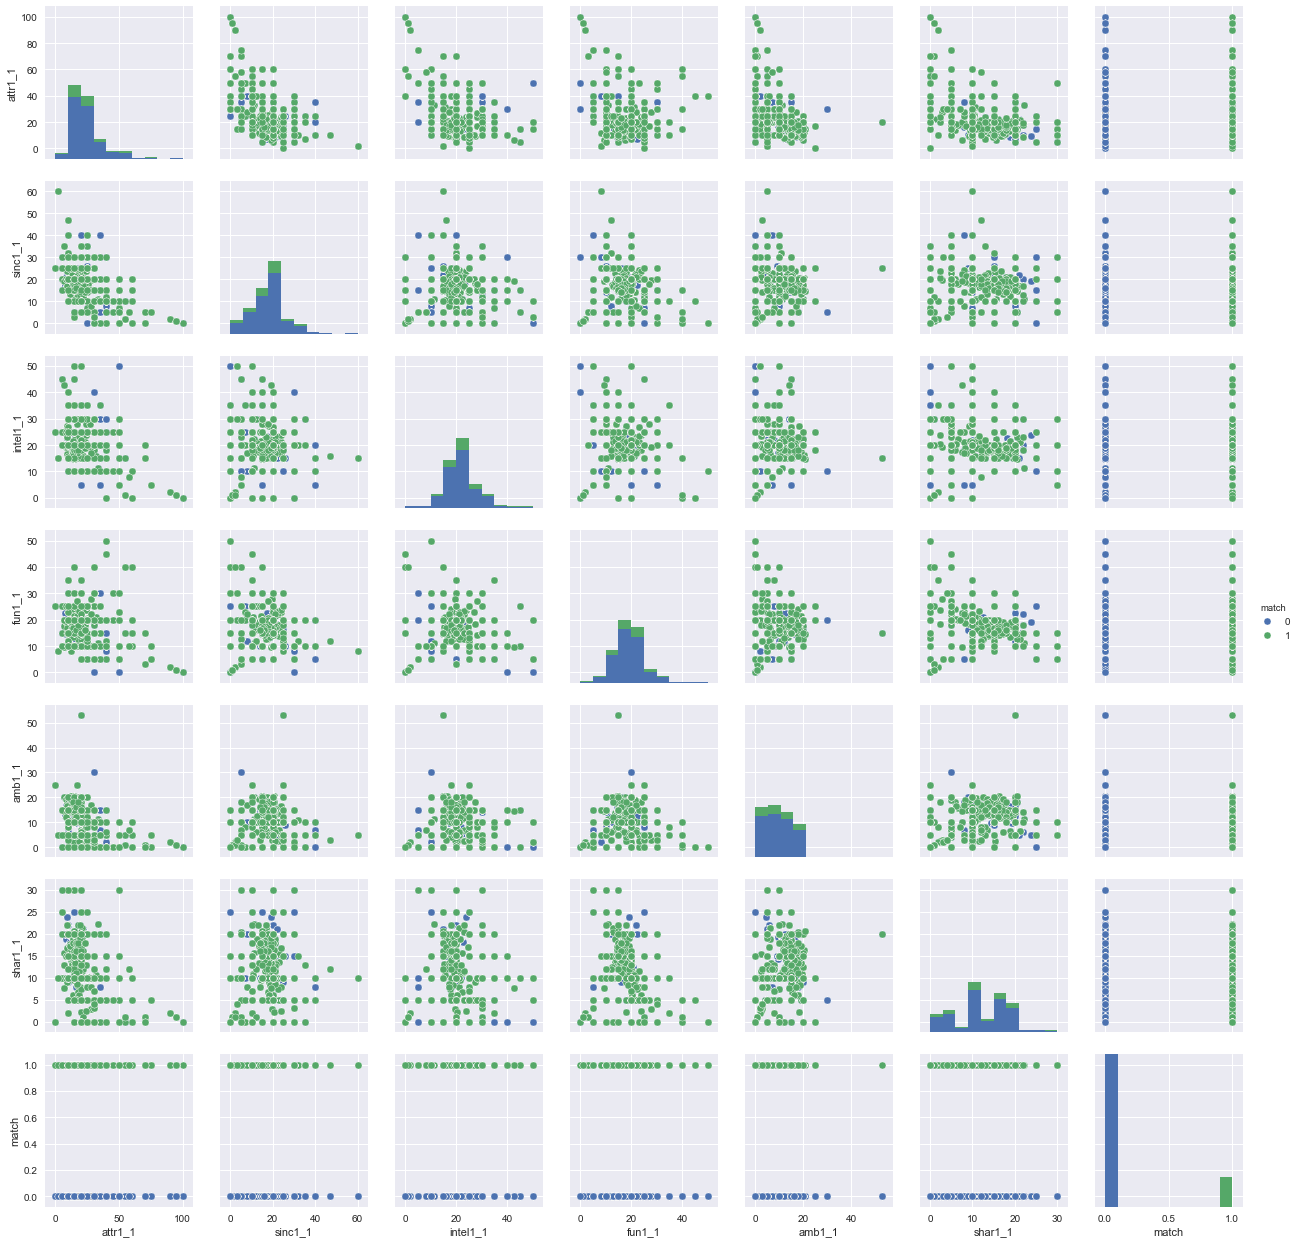

In [267]:
# variables for pairplot
attributes1 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'match']
df_attributes1 = sddf[attributes1]
df_attributes1.head()

g= sns.pairplot(df_attributes1.dropna(), hue = 'match')

In [268]:
# T-test for testing correlation between continuous and categorical # do
# Chi-square test for testing correlation between categorical and categorical # do for race + match

from scipy.stats import ttest_ind

# we want them correlated because we're testing between outcome and independent variable - p value < 0.05
# 2 sample t-test: independent samples - match = 0, match = 1

sample_attr1 = sddf[sddf.match == 0].attr1_1.dropna()
sample_attr2 = sddf[sddf.match == 1].attr1_1.dropna()

sample_sinc1 = sddf[sddf.match == 0].sinc1_1.dropna()
sample_sinc2 = sddf[sddf.match == 1].sinc1_1.dropna()

sample_intel1 = sddf[sddf.match == 0].intel1_1.dropna()
sample_intel2 = sddf[sddf.match == 1].intel1_1.dropna()

sample_fun1 = sddf[sddf.match == 0].fun1_1.dropna()
sample_fun2 = sddf[sddf.match == 1].fun1_1.dropna()

sample_amb1 = sddf[sddf.match == 0].amb1_1.dropna()
sample_amb2 = sddf[sddf.match == 1].amb1_1.dropna()

sample_shar1 = sddf[sddf.match == 0].shar1_1.dropna()
sample_shar2 = sddf[sddf.match == 1].shar1_1.dropna()


print "attractiveness: " + str(ttest_ind(sample_attr1, sample_attr2))
print "sincerity: " + str(ttest_ind(sample_sinc1, sample_sinc2))
print "intelligence: " + str(ttest_ind(sample_intel1, sample_intel2))
print "fun: " + str(ttest_ind(sample_fun1, sample_fun2))
print "ambition: " + str(ttest_ind(sample_amb1, sample_amb2))
print "shared interests: " + str(ttest_ind(sample_shar1, sample_shar2))

attractiveness: Ttest_indResult(statistic=-1.2744394632147511, pvalue=0.20254306942328174)
sincerity: Ttest_indResult(statistic=2.8467842838890074, pvalue=0.0044270651014479282)
intelligence: Ttest_indResult(statistic=-1.4205388293193502, pvalue=0.15548809511884926)
fun: Ttest_indResult(statistic=-3.853805418946513, pvalue=0.00011716479085505583)
ambition: Ttest_indResult(statistic=0.40427385219158812, pvalue=0.68602179670386576)
shared interests: Ttest_indResult(statistic=4.4623394696004928, pvalue=8.212896521759073e-06)


Based on above t-test results, we can see that following attributes are associated with match outcome variable with a p-value less than 5%.

- sincerity
- fun
- shared interests

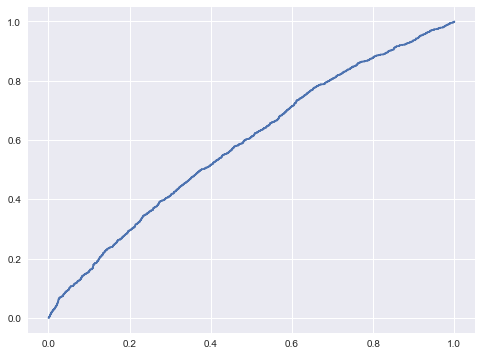

In [276]:
# check for confounding factors using logistic regression

# removed 1 attribute to ensure non-colinearity - ambition1_1 & ambition2_1
feature_set = ['gender', 'race', 'age', 'samerace', 'imprace', 'imprelig', \
               'int_corr', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'shar1_1', \
               'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'shar2_1']

# need to create dummy variables for categoricals? - gender / race ?


from sklearn import linear_model as lm
from sklearn.metrics import roc_curve

model = lm.LogisticRegression(C=1e10) # ensure basic logistic regression
model.fit(df_nonull[feature_set], df_nonull['match'])
probas = model.predict_proba(df_nonull[feature_set])


plt.plot(roc_curve(df_nonull[['match']], probas[:,1])[0], roc_curve(df_nonull[['match']], probas[:,1])[1])

In [52]:
# Lasso (L1) / Stepwise regression / ANOVA for variable selection
# Predict match (1=yes, 0 = no) using Decision Tress + Random Forest + Logistic Regression

In [ ]:
# Do PCA to build model with fewer features, but loses interpretability